In [ ]:
! pip install ultralytics

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.3/41.3 kB 442.6 kB/s eta 0:00:00
  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cusolver_cu12-11.4.5.107-py3-none-manylinux1_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_cusparse_cu12-12.1.0.106-py3-none-manylinux1_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_nccl_cu12-2.20.5-py3-none-manylinux2014_x86_6

In [ ]:
! pip install PIL

ERROR: Could not find a version that satisfies the requirement PIL (from versions: none)
ERROR: No matching distribution found for PIL


In [ ]:
import cv2
import numpy as np
from PIL import Image as PILImage
from scipy.signal import argrelextrema
import matplotlib.pyplot as plt
from ultralytics import YOLO
from IPython.display import display, Javascript, Image
from google.colab.output import eval_js
from base64 import b64decode, b64encode
import io
import time
import threading

<IPython.core.display.Javascript object>


0: 608x800 (no detections), 2006.3ms
Speed: 9.9ms preprocess, 2006.3ms inference, 0.6ms postprocess per image at shape (1, 3, 608, 800)


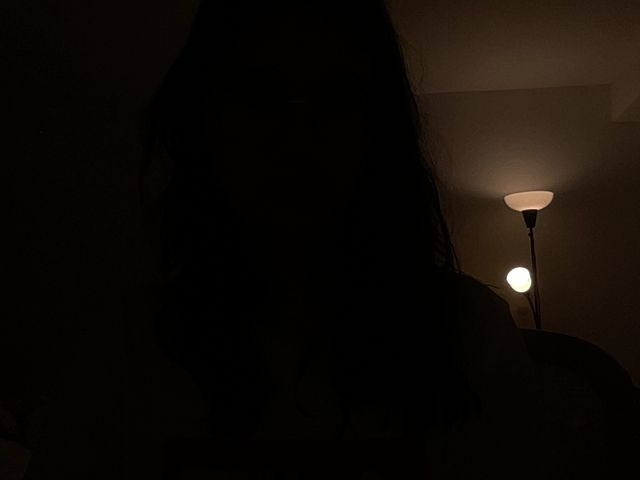


0: 608x800 1 chest, 1 head, 688.2ms
Speed: 5.5ms preprocess, 688.2ms inference, 0.9ms postprocess per image at shape (1, 3, 608, 800)


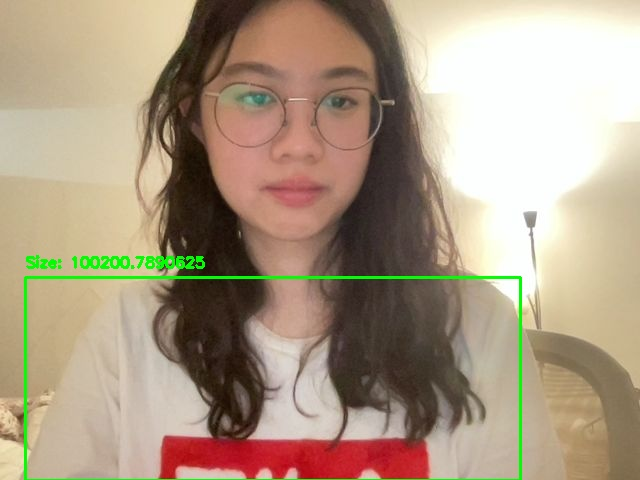


0: 608x800 2 chests, 1 head, 710.0ms
Speed: 5.9ms preprocess, 710.0ms inference, 1.0ms postprocess per image at shape (1, 3, 608, 800)


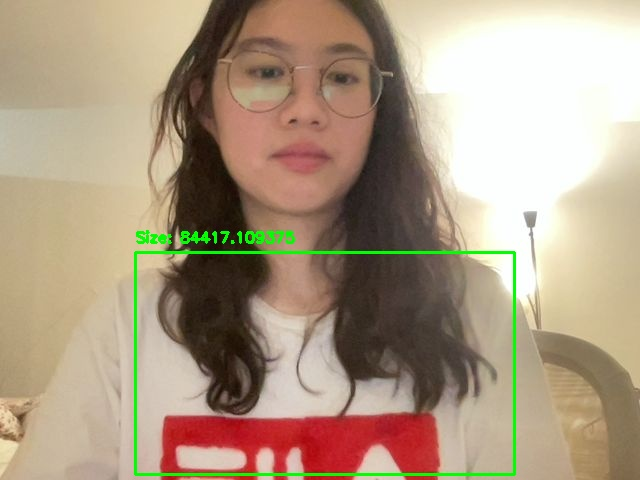


0: 608x800 2 chests, 1 head, 712.4ms
Speed: 4.7ms preprocess, 712.4ms inference, 1.0ms postprocess per image at shape (1, 3, 608, 800)


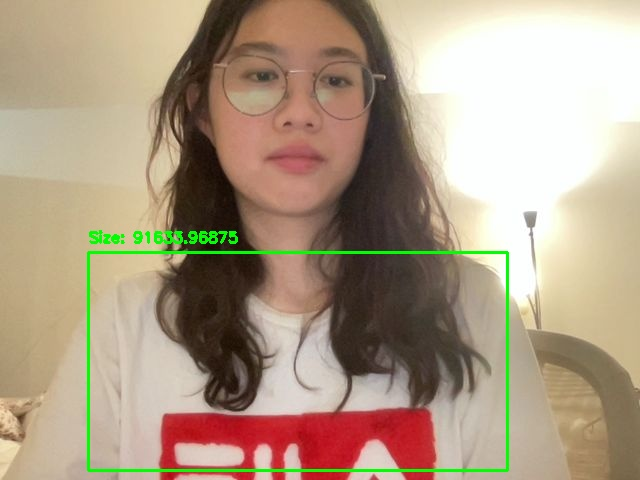


0: 608x800 1 chest, 1 head, 704.9ms
Speed: 6.8ms preprocess, 704.9ms inference, 1.5ms postprocess per image at shape (1, 3, 608, 800)


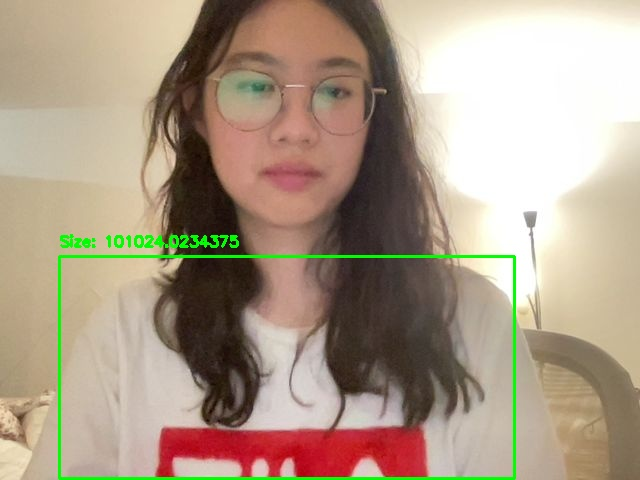


0: 608x800 1 chest, 1 head, 703.0ms
Speed: 6.2ms preprocess, 703.0ms inference, 1.0ms postprocess per image at shape (1, 3, 608, 800)


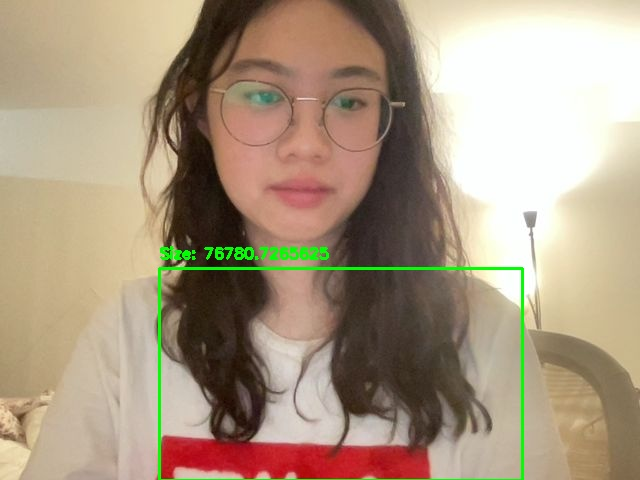


0: 608x800 1 chest, 1 head, 705.9ms
Speed: 6.4ms preprocess, 705.9ms inference, 1.0ms postprocess per image at shape (1, 3, 608, 800)


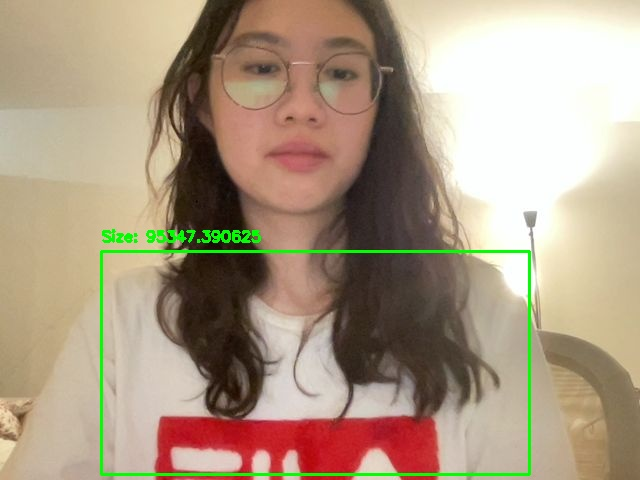


0: 608x800 2 chests, 1 head, 705.8ms
Speed: 8.7ms preprocess, 705.8ms inference, 0.9ms postprocess per image at shape (1, 3, 608, 800)


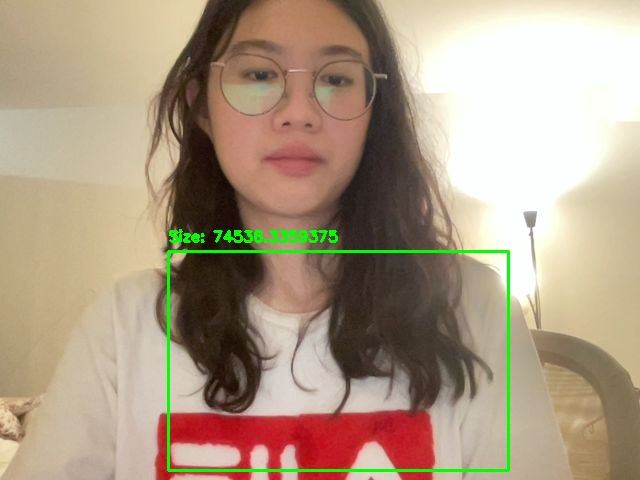


0: 608x800 1 chest, 1 head, 955.5ms
Speed: 8.5ms preprocess, 955.5ms inference, 1.2ms postprocess per image at shape (1, 3, 608, 800)


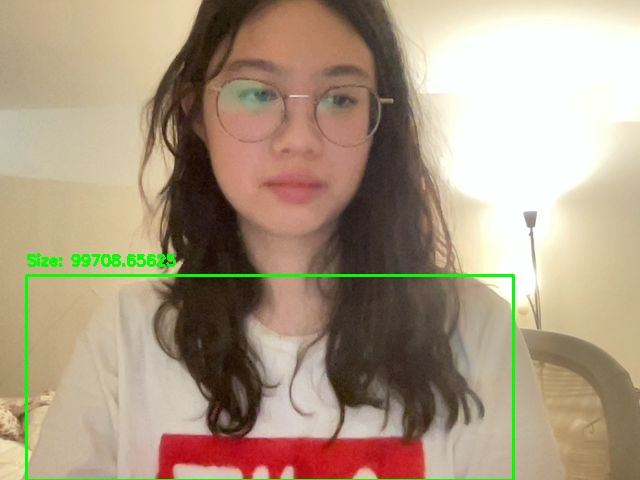


0: 608x800 1 chest, 1 head, 1145.8ms
Speed: 7.6ms preprocess, 1145.8ms inference, 1.3ms postprocess per image at shape (1, 3, 608, 800)


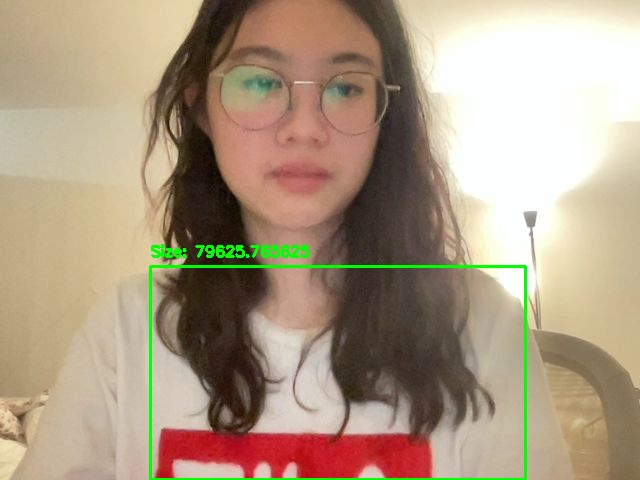


0: 608x800 1 chest, 1 head, 706.1ms
Speed: 5.5ms preprocess, 706.1ms inference, 1.0ms postprocess per image at shape (1, 3, 608, 800)


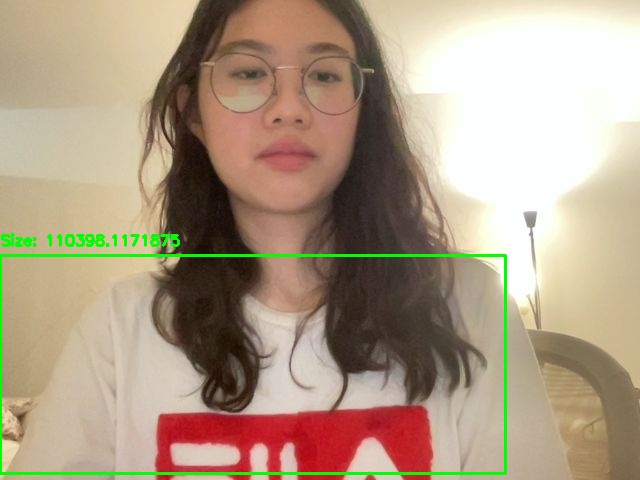


0: 608x800 1 chest, 1 head, 703.4ms
Speed: 5.7ms preprocess, 703.4ms inference, 0.9ms postprocess per image at shape (1, 3, 608, 800)


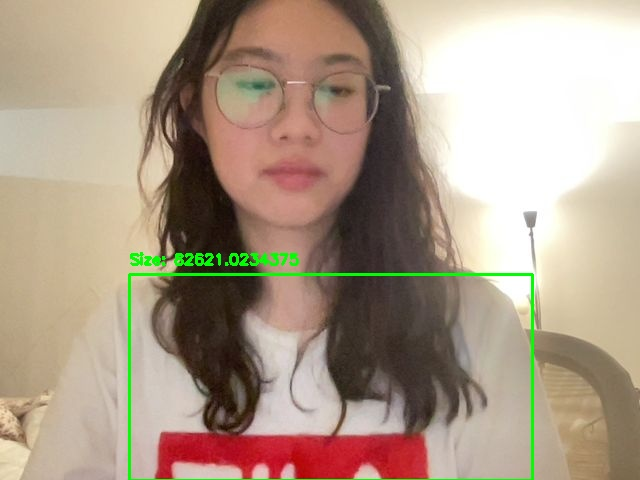


0: 608x800 1 chest, 1 head, 747.9ms
Speed: 5.7ms preprocess, 747.9ms inference, 0.9ms postprocess per image at shape (1, 3, 608, 800)


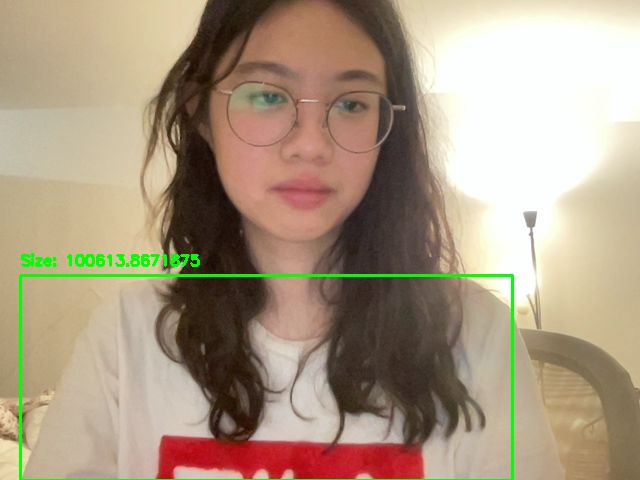


0: 608x800 1 chest, 1 head, 716.9ms
Speed: 7.1ms preprocess, 716.9ms inference, 1.0ms postprocess per image at shape (1, 3, 608, 800)


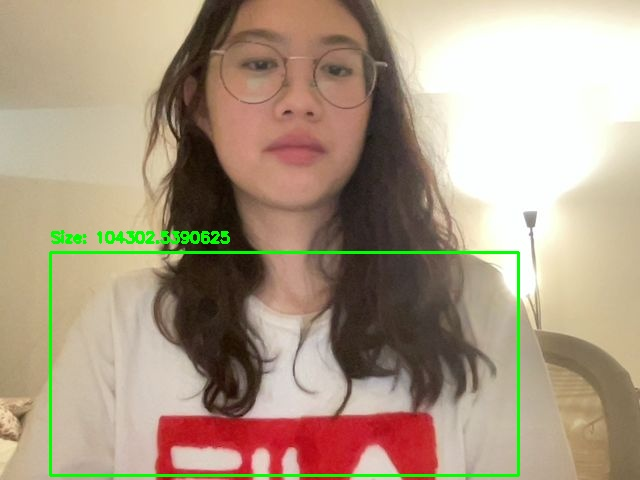


0: 608x800 1 chest, 1 head, 713.4ms
Speed: 8.3ms preprocess, 713.4ms inference, 1.0ms postprocess per image at shape (1, 3, 608, 800)


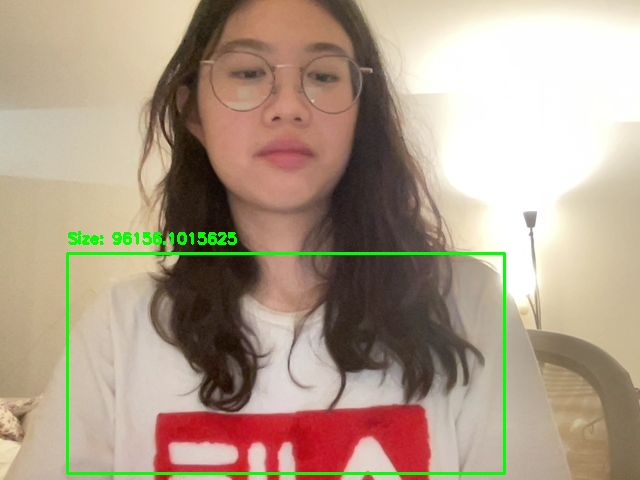


0: 608x800 1 chest, 1 head, 703.8ms
Speed: 6.3ms preprocess, 703.8ms inference, 1.0ms postprocess per image at shape (1, 3, 608, 800)


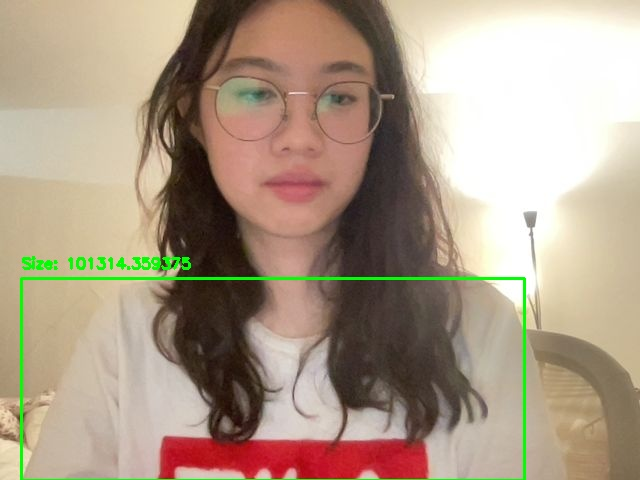

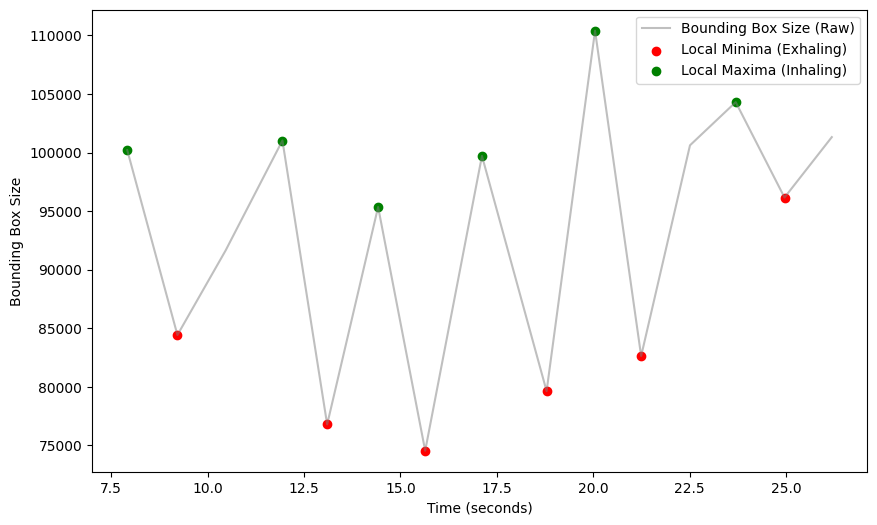

Exhale end and Inhale start at 9.22s
Exhale end and Inhale start at 13.10s
Exhale end and Inhale start at 15.64s
Exhale end and Inhale start at 18.79s
Exhale end and Inhale start at 21.24s
Exhale end and Inhale start at 24.96s
Inhale end and Exhale start at 7.92s
Inhale end and Exhale start at 11.94s
Inhale end and Exhale start at 14.42s
Inhale end and Exhale start at 17.11s
Inhale end and Exhale start at 20.05s
Inhale end and Exhale start at 23.70s


In [ ]:


# Load the YOLOv8 model
model = YOLO(f'/content/best.pt')  # Update the path to your YOLO model

# Function to calculate bounding box size
def calculate_bbox_size(bbox):
    x1, y1, x2, y2 = bbox
    width = x2 - x1
    height = y2 - y1
    return width * height

# Function to get chest bounding box based on labels
def get_chest_bounding_box(predictions):
    chest_bbox = None

    for pred in predictions:
        x1, y1, x2, y2, conf, label = pred
        if label == 0:  # Chest
            chest_bbox = (x1, y1, x2, y2)
            break

    return chest_bbox

# Convert JavaScript object to OpenCV image
def js_to_image(js_reply):
    image_bytes = b64decode(js_reply.split(',')[1])
    jpg_as_np = np.frombuffer(image_bytes, dtype=np.uint8)
    img = cv2.imdecode(jpg_as_np, flags=1)
    return img

# Convert OpenCV Rectangle bounding box image into base64 byte string to be overlayed on video stream
def bbox_to_bytes(bbox_array):
    bbox_PIL = PILImage.fromarray(bbox_array, 'RGBA')
    iobuf = io.BytesIO()
    bbox_PIL.save(iobuf, format='png')
    bbox_bytes = 'data:image/png;base64,{}'.format((str(b64encode(iobuf.getvalue()), 'utf-8')))
    return bbox_bytes

# JavaScript code to capture video from webcam
def video_stream():
    js = Javascript('''
        var video;
        var div = null;
        var stream;
        var captureCanvas;
        var imgElement;
        var labelElement;

        var pendingResolve = null;
        var shutdown = false;

        function removeDom() {
            stream.getVideoTracks()[0].stop();
            video.remove();
            div.remove();
            video = null;
            div = null;
            stream = null;
            imgElement = null;
            captureCanvas = null;
            labelElement = null;
        }

        function onAnimationFrame() {
            if (!shutdown) {
                window.requestAnimationFrame(onAnimationFrame);
            }
            if (pendingResolve) {
                var result = "";
                if (!shutdown) {
                    captureCanvas.getContext('2d').drawImage(video, 0, 0, 640, 480);
                    result = captureCanvas.toDataURL('image/jpeg', 0.8)
                }
                var lp = pendingResolve;
                pendingResolve = null;
                lp(result);
            }
        }

        async function createDom() {
            if (div !== null) {
                return stream;
            }

            div = document.createElement('div');
            div.style.border = '2px solid black';
            div.style.padding = '3px';
            div.style.width = '100%';
            div.style.maxWidth = '600px';
            document.body.appendChild(div);

            const modelOut = document.createElement('div');
            modelOut.innerHTML = "<span>Status:</span>";
            labelElement = document.createElement('span');
            labelElement.innerText = 'No data';
            labelElement.style.fontWeight = 'bold';
            modelOut.appendChild(labelElement);
            div.appendChild(modelOut);

            video = document.createElement('video');
            video.style.display = 'block';
            video.width = div.clientWidth - 6;
            video.setAttribute('playsinline', '');
            video.onclick = () => { shutdown = true; };
            stream = await navigator.mediaDevices.getUserMedia(
                {video: { facingMode: "environment"}});
            div.appendChild(video);

            imgElement = document.createElement('img');
            imgElement.style.position = 'absolute';
            imgElement.style.zIndex = 1;
            imgElement.onclick = () => { shutdown = true; };
            div.appendChild(imgElement);

            const instruction = document.createElement('div');
            instruction.innerHTML =
                '<span style="color: red; font-weight: bold;">' +
                'When finished, click here or on the video to stop this demo</span>';
            div.appendChild(instruction);
            instruction.onclick = () => { shutdown = true; };

            video.srcObject = stream;
            await video.play();

            captureCanvas = document.createElement('canvas');
            captureCanvas.width = 640; //video.videoWidth;
            captureCanvas.height = 480; //video.videoHeight;
            window.requestAnimationFrame(onAnimationFrame);

            return stream;
        }

        async function stream_frame(label, imgData) {
            if (shutdown) {
                removeDom();
                shutdown = false;
                return '';
            }

            var preCreate = Date.now();
            stream = await createDom();

            var preShow = Date.now();
            if (label != "") {
                labelElement.innerHTML = label;
            }

            if (imgData != "") {
                var videoRect = video.getClientRects()[0];
                imgElement.style.top = videoRect.top + "px";
                imgElement.style.left = videoRect.left + "px";
                imgElement.style.width = videoRect.width + "px";
                imgElement.style.height = videoRect.height + "px";
                imgElement.src = imgData;
            }

            var preCapture = Date.now();
            var result = await new Promise(function(resolve, reject) {
                pendingResolve = resolve;
            });
            shutdown = false;

            return {'create': preShow - preCreate,
                    'show': preCapture - preShow,
                    'capture': Date.now() - preCapture,
                    'img': result};
        }
    ''')
    display(js)

def video_frame(label, bbox):
    data = eval_js('stream_frame("{}", "{}")'.format(label, bbox))
    return data

# Start video streaming
video_stream()
label_html = 'Capturing...'
bbox = ''
count = 0

# Initialize lists to store sizes and times
sizes = []
timestamps = []

frame_count = 0
start_time = time.time()

# Frame processing thread function
def process_frame():
    global bbox, sizes, timestamps, frame_count, start_time

    while True:
        js_reply = video_frame(label_html, bbox)
        if not js_reply:
            break

        # Convert JS response to OpenCV Image
        frame = js_to_image(js_reply["img"])

        # Convert frame to PIL Image
        pil_img = PILImage.fromarray(cv2.cvtColor(frame, cv2.COLOR_BGR2RGB))


        results = model(pil_img)
        predictions = results[0].boxes.data.cpu().numpy()

        # Get chest bounding box
        chest_bbox = get_chest_bounding_box(predictions)

        if chest_bbox:
            # Size Calculation and Logging
            size = calculate_bbox_size(chest_bbox)
            sizes.append(size)
            time_in_seconds = time.time() - start_time
            timestamps.append(time_in_seconds)
            frame_count += 1

            # Real-time Bounding Box Drawing
            x1, y1, x2, y2 = map(int, chest_bbox)
            frame = cv2.rectangle(frame, (x1, y1), (x2, y2), (0, 255, 0), 2)
            cv2.putText(frame, f"Size: {size}", (x1, y1 - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 255, 0), 2)

            bbox_array = np.zeros([480, 640, 4], dtype=np.uint8)
            bbox_array = cv2.rectangle(bbox_array, (x1, y1), (x2, y2), (0, 255, 0), 2)
            bbox_array[:, :, 3] = (bbox_array.max(axis=2) > 0).astype(int) * 255
            bbox_bytes = bbox_to_bytes(bbox_array)

        # Convert the frame back to base64
        _, img_buffer = cv2.imencode('.jpg', frame)
        img_str = 'data:image/jpeg;base64,' + b64encode(img_buffer).decode('utf-8')

        # Update bbox so the next frame gets the new overlay
        bbox = img_str

        # Display the Frame
        display(Image(data=b64decode(img_str.split(',')[1])))

# Start frame processing thread
thread = threading.Thread(target=process_frame)
thread.start()

# Wait for the thread to finish
thread.join()

# Convert lists to numpy arrays
if sizes and timestamps:  # Proceed only if sizes and timestamps are not empty
    sizes = np.array(sizes)
    timestamps = np.array(timestamps)

    # Detect local minima and maxima on raw data
    local_minima = argrelextrema(sizes, np.less)[0]
    local_maxima = argrelextrema(sizes, np.greater)[0]

    # Ensure the first peak point is considered a local maxima
    if local_maxima[0] > local_minima[0]:
        local_maxima = np.insert(local_maxima, 0, 0)

    # Plot the results
    plt.figure(figsize=(10, 6))
    plt.plot(timestamps, sizes, color='gray', alpha=0.5, label='Bounding Box Size (Raw)')
    plt.scatter(timestamps[local_minima], sizes[local_minima], color='red', label='Local Minima (Exhaling)')
    plt.scatter(timestamps[local_maxima], sizes[local_maxima], color='green', label='Local Maxima (Inhaling)')
    plt.xlabel('Time (seconds)')
    plt.ylabel('Bounding Box Size')
    plt.legend()
    plt.show()

    # Output inhaling and exhaling events
    for min_idx in local_minima:
        print(f"Exhale end and Inhale start at {timestamps[min_idx]:.2f}s")
    for max_idx in local_maxima:
        print(f"Inhale end and Exhale start at {timestamps[max_idx]:.2f}s")
else:
    print("No bounding box sizes were recorded.")


In [ ]:
! pip install torchvision

In [ ]:
!pip install onnx

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.9/15.9 MB 59.1 MB/s eta 0:00:00


In [ ]:
import torch
from ultralytics import YOLO

# Load the YOLOv8 model
model = YOLO(f'/content/best.pt')  # Update the path to your YOLO model



# Create a dummy input tensor with the same size as the input expected by the model
dummy_input = torch.randn(1, 3, 224, 224) # Adjust the size according to your model's input size

# Export the model to ONNX format
torch.onnx.export(model.model,              # model being run
                  dummy_input,              # model input (or a tuple for multiple inputs)
                  "example.onnx",           # where to save the model (can be a file or file-like object)
                  export_params=True,       # store the trained parameter weights inside the model file
                  opset_version=11,         # the ONNX version to export the model to
                  do_constant_folding=True, # whether to execute constant folding for optimization
                  input_names = ['input'],  # the model's input names
                  output_names = ['output'] # the model's output names
                  )


In [ ]:
def find_input_shape(model):
    for size in [224, 256, 299, 320]:  # Common input sizes
        try:
            dummy_input = torch.randn(1, 3, size, size)
            output = model(dummy_input)
            print(f"Model accepts input shape: (1, 3, {size}, {size})")
            return dummy_input
        except RuntimeError as e:
            if "size mismatch" not in str(e):
                raise
    raise ValueError("Couldn't determine input shape")

dummy_input = find_input_shape(model)


WARNING ⚠️ torch.Tensor inputs should be normalized 0.0-1.0 but max value is 4.562695503234863. Dividing input by 255.
0: 224x224 (no detections), 211.8ms
Speed: 0.1ms preprocess, 211.8ms inference, 2.1ms postprocess per image at shape (1, 3, 224, 224)
Model accepts input shape: (1, 3, 224, 224)


In [ ]:
! pip install onnxsim

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.3/2.3 MB 19.8 MB/s eta 0:00:00


In [ ]:
import onnx
from onnxsim import simplify

# load your predefined ONNX model

model = onnx.load("example.onnx")

# convert model
model_simp, check = simplify(model)

assert check, "Simplified ONNX model could not be validated"

# use model_simp as a standard ONNX model object

In [ ]:
# Save the simplified model
output_filename = "/content/simplified.onnx"
onnx.save(model_simp, output_filename)

print(f"Simplified model saved to {output_filename}")

Simplified model saved to /content/simplified.onnx
